This notebook tests if the datassets created by the create_waveform_dataset_test.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [2]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
# from pnwstore.mseed import WaveformClient

## Verify the test datasets

### Verify the test datasets for HH/BH

In [3]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_HH_BH.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print(f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        

    

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/wd1/hbito_data/data/datasets_all_regions/waveforms_HH_BH.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_HH_BH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

FileNotFoundError: [Errno 2] No such file or directory: '/wd1/hbito_data/data/datasets_all_regions/metadata_HH_BH_test1.csv'

### Verify the test datasets for EH

Keys in HDF5 file:
 - data
f['data'].keys() <KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(28, 1, 14998), min=-5441.53, max=6794.99
 - 1: shape=(44, 1, 14998), min=-2412.63, max=3304.96
 - 10: shape=(43, 1, 14998), min=-6644.83, max=6889.11
 - 2: shape=(44, 1, 14998), min=-38004.95, max=14835.46
 - 3: shape=(44, 1, 14998), min=-25541.45, max=10659.71
 - 4: shape=(38, 1, 14998), min=-10491.40, max=2520.34
 - 5: shape=(47, 1, 14998), min=-2428.38, max=2054.78
 - 6: shape=(37, 1, 14998), min=-15931.30, max=12717.25
 - 7: shape=(45, 1, 14998), min=-10304.41, max=11613.59
 - 8: shape=(57, 1, 14998), min=-8268.68, max=7267.23
 - 9: shape=(40, 1, 14998), min=-5064.24, max=3664.54
samplewaveform shape: (1, 14998)


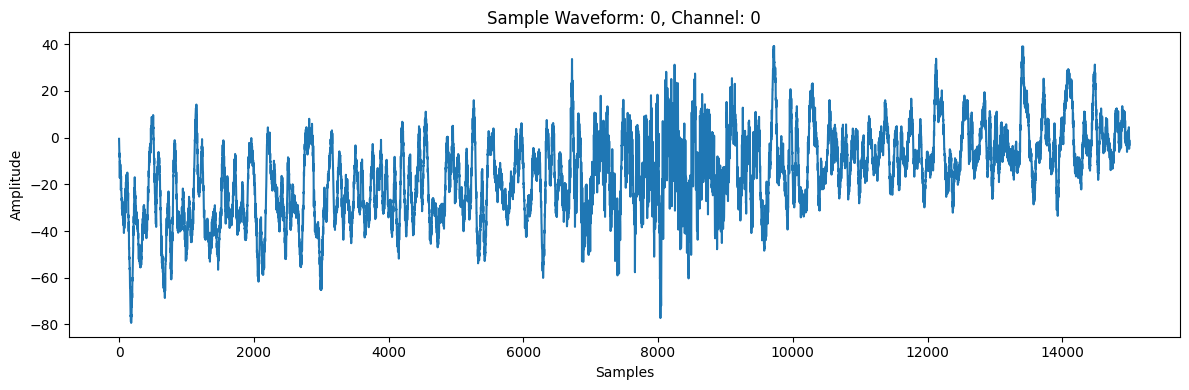

In [5]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_EH_test1.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print("f['data'].keys()",f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        


In [6]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_EH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B013,NaN,47.813000,-122.910797,75.3,"8$0,:1,:14998","8$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7635.0,NaN,impulsive,NaN
1,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B943,NaN,47.813202,-122.911301,84.2,"3$0,:1,:14998","3$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7650.0,NaN,impulsive,NaN
2,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,BOW,NaN,46.474831,-123.229301,870.0,"5$0,:1,:14998","5$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,8079.0,NaN,impulsive,NaN
3,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,PCMD,NaN,46.888962,-122.301483,239.0,"3$1,:1,:14998","3$1,:1,:14998",100,2010-01-01T00:14:27.262282Z,6601.0,5991.0,impulsive,impulsive
4,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,RVW,NaN,46.149750,-122.742996,504.0,"4$0,:1,:14998","4$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,NaN,7057.0,NaN,impulsive
5,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,BIB,NaN,49.410300,-123.310500,38.0,"10$0,:1,:14998","10$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9863.0,7772.0,impulsive,impulsive
6,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,GOBB,NaN,48.949300,-123.510500,173.0,"9$0,:1,:14998","9$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9425.0,7508.0,impulsive,impulsive
7,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,VDB,NaN,49.026100,-122.102800,404.0,"3$2,:1,:14998","3$2,:1,:14998",100,2010-01-01T00:15:59.375360Z,NaN,6577.0,NaN,impulsive
8,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,WPB,NaN,49.647800,-123.209400,260.0,"8$1,:1,:14998","8$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,10283.0,8011.0,impulsive,impulsive
9,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,PB,EH,B001,NaN,48.043072,-123.131409,237.0,"9$1,:1,:14998","9$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,8086.0,6763.0,impulsive,impulsive
